# MTGA Rarity Analysis
##### By Jacob Corum

## Background

For many months now I have rigorously played Magic: The Gathering Arena and I can honestly say that I believe MTGA will keep Magic: The Gathering relevant as a hobby for decades to come. I have played Magic for most of my childhood and everything that was introduced to the game through Arena seems like an addition: suddenly cards that I couldn't afford before are now own in quartets online, decks that I couldn't build I have now built and expanded upon, multiple high-tier decks I are in my inventory to play at my leisure, and my skills as a player have dramatically increased. I enjoy the new loot-crate feel to the game; its easy to get into since its basically free to play and anything extra is of course an extra fee, but not too much. The game has removed the direct money-for-cards aspect of the original game with a third step, gems, that make me feel better about spending massive amounts on cards and the semi-random element ensures that I will be coming back, a lot. Aside from these benefits, benefits that nearly leave me to wonder why anyone would play the old card game except for collectors, it also has something wanting in the game’s ability to satisfy the need to beat the tar out of other players with perfectly crafted decks. If Magic: the Gathering Arena was meant to remove the pain of buying incredibly expensive cards and deliver a better experience, then there is something left to be said for its ecosystem, namely gems and wildcards, because, for the present, it is blatantly obvious to me the selling point of buying gems, other than that they are fun to buy. If I don't buy them then I might have to collect rare wild cards for a very long time. 

This seems counter-intuitive, mythic rare cards are harder to get, shouldn’t you be waiting on those? Though that is intuitive, rares are much more common in competitive decks than mythic rares are, and the rate at which a player can obtain rare wildcards is much slower than they will have a need for them. Mythic rare wildcards don't have this problem. Thus a player, myself included, will oftentimes find themselves with a heap of common wildcards (as they should), many uncommon wildcards (as they should), no rare wildcards, and a few mythic rare wildcards. I would suggest that Wizards of the Coast modify the ecosystem so that a competitive player will be in constant want of mythic rares and have one or two rare wildcards at their expense most of the time. 

This analysis attempts to discover what the average number of rares are in competitive decks and compare that to a statement believed to be released by Wizards of the Coast to see if there is a difference between the two. 

## Introduction

I did a bit of research to see if Wizards of the Coast had come out with a statement that could explain the phenomena that I was experiencing. I found one (albeit an unchecked source) that suggested that players will need an average of 7 mythic rares, 23 rares, and 120 packs to build a competitive deck. Though this seemed fair to me I also hesitate to trust heuristics. Without data provided, I had to go find some and test this hypothesis myself. I scraped mtgtop8.com for the deck lists of about 400 players, and then merged that with data on card attributes from mtgjson.com. What resulted was a data set that described how many cards of each rarity are in a professional player's deck. 

## Analysis

The violin plot below shows all four rarities on the x axis and the number of that rarity on the y axis. The area of the violin shapes correlate with how many decks have that number of rarity in it. For example: the violin shape with the label "Rare" underneath it has one thick portion on top, then gets skinnier, and then is wide on the bottom again. This means that a lot of decks have about 35 rares, fewer have 30, but many also have about 25. The three dotted lines in the violins represent quartiles in the data, meaning that the middle dotted line represents the median. 

In [1]:
# import requests to pull data from my github repo and pandas for formatting that data
import requests
import pandas as pd

# store request object as r
r = requests.get('https://raw.githubusercontent.com/jcorum11/MTGA_rarity_analysis/master/data/decks_archive.csv')

# open a new file called decks_archive.csv and write the text from r into that file
with open('decks_archive.csv', 'w') as file:
    file.write(r.text)

# open the newly saved file as a pandas DataFrame
decks_clean = pd.read_csv('decks_archive.csv')

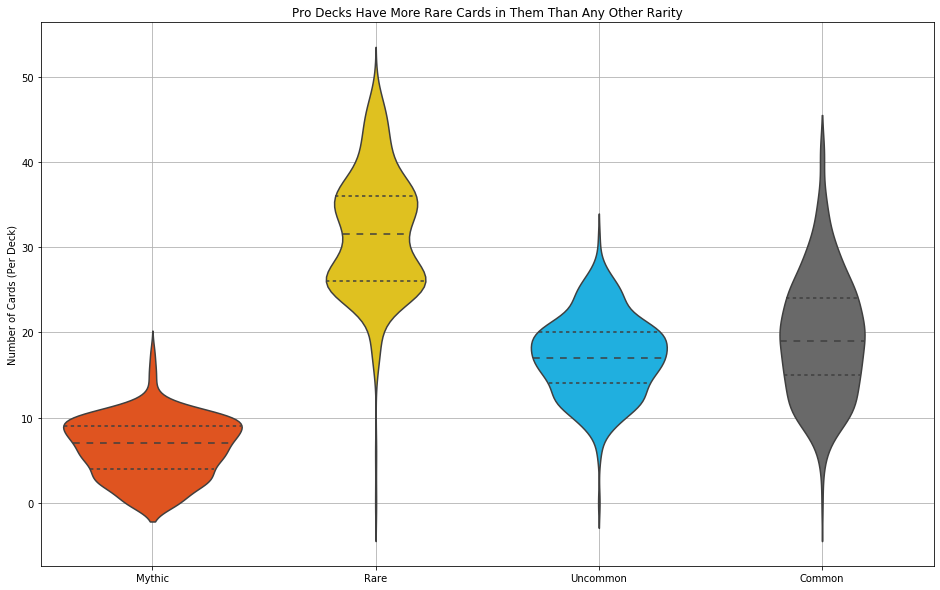

In [2]:
# prepare data by merging the four rarity columns into one column called `rarity` and another column called `num`
df_rarities = decks_clean.melt(value_vars=['mythic', 'rare', 'uncommon', 'common'], value_name='num', var_name='card_rarity')

# capitalize the rarities in the `rarity` column
df_rarities.card_rarity = df_rarities.card_rarity.replace('mythic', 'Mythic').replace('rare', 'Rare').replace('uncommon', 'Uncommon').replace('common', 'Common')

# import seaborn to create a violinplot and pyplot to modify it
import matplotlib.pyplot as plt
import seaborn as sns

# create an array of colors for the graphic
colors = ['orangered', 'gold', 'deepskyblue', 'dimgrey']

# create a custom pallette with seaborn to accurately represent data
custom_pallette = sns.set_palette(sns.color_palette(colors))

# create a larger figure than the default
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(1, 1, 1)

# modify setting for gridlines to set below the graphic
ax.set_axisbelow(True)

# draw the violinplot
sns.violinplot(x='card_rarity', y='num', data=df_rarities, palette=custom_pallette, inner='quartile')

# draw a grid
plt.grid()

# set text for title, y label, and remove the x label
plt.title('Pro Decks Have More Rare Cards in Them Than Any Other Rarity')
plt.ylabel('Number of Cards (Per Deck)')
plt.xlabel('');

The violin plot below shows all four rarities on the x axis and the number of that rarity on the y axis. The area of the violin shapes correlate with how many decks have that number of rarity in it. For example: the violin shape with the label "Rare" underneath it has one thick portion on top, then gets skinnier, and then is wide on the bottom again. This means that a lot of decks have about 35 rares, fewer have 30, but many also have about 25. The three dotted lines in the violins represent quartiles in the data, meaning that the middle dotted line represents the median. 

In [3]:
# import numpy to draw samples and calculate means
import numpy as np

# create an empty array where means will be put
rare_means = []

# create loop that will loop 1000 iterations
for _ in range(1000):
    
    # draw a sample of 200 decks and where decks can be drawn multiple times and call it boot
    boot = decks_clean.rare.sample(200, replace=True)
    
    #get the mean of of boot and call it boot_mean
    boot_mean = boot.mean()
    
    # add boot_mean to the array rare_means
    rare_means.append(boot_mean)

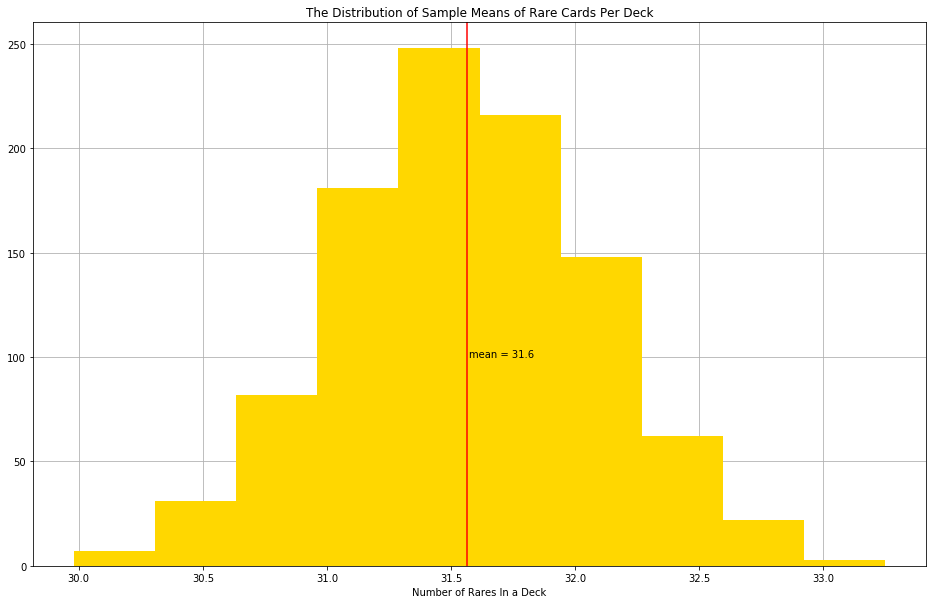

In [4]:
# create a larger figure than the default
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(1, 1, 1)

# modify setting for gridlines to set below the graphic
ax.set_axisbelow(True)

# create a vertical red line at the mean of the data
plt.axvline(x=np.mean(rare_means), color='r')

# draw a histogram
plt.hist(rare_means, color='gold')

# put a label to describe the red line
plt.text(np.mean(rare_means)+0.01, 100, 'mean = ' + str(round(np.mean(rare_means), 1)))

# draw gridlines
plt.grid()

# write text for a title and an x label
plt.title('The Distribution of Sample Means of Rare Cards Per Deck')
plt.xlabel('Number of Rares In a Deck');

The red line indicates the mean of the sampling distribution which is higher than 23. Since this distribution is theoretical, I then calculated a confidence interval shown below.

In [5]:
# use numpy to calculate two percentile ranges that will serve as the upper and lower bounds of the confidence interval
round(np.percentile(rare_means, 5), 1), round(np.percentile(rare_means, 95))

(30.7, 32.0)

This interval suggests that we can be 95% confident that the population mean of rare wild cards in a deck lies between 30.7 and 32.0.

## Conclusion

Since we can be almost certain that the population mean is higher than 23 rares per deck, it follows that to improve the game the ecosystem should be changed to reflect the number of cards that an average deck has. Rare cards should be easier to obtain since the demand for them is likely higher than previously thought and Mythic rare cards should be harder to obtain since less of them are in demand. This will make the game feel more sensible to the consistent player by making mythic rare cards more valuable than rare cards instead of the other way around. Also, it will make players more willing to build and test new decks since they will not need invest long periods of time, or spend so much money on packs to collect essential Rare cards and risk running out of time before set rotation. 

Much can be improved in this analysis. Other cards, especially mythic rares, need to be examined to see if data can suggest that the population mean is significantly different. Also the meta of Magic the Gathering Arena should be examined to see if the population of players play decks similar to professional decks, if they buy cards to add to a collection or to play them in tournaments, and what format is most often played. Next steps include collecting data from other sources to get a more representative sample of decks. 